In [162]:
import pandas as pd 
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import FormulaRule
import matplotlib
import matplotlib.pyplot as plt
covid_data=pd.read_csv("covid_data.csv",index_col=0)
covid_data_copy=covid_data.copy()

In [163]:
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases
date,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0
2024-01-02,Kenya,1250,22.0,NaN,408.0
2024-01-03,Kenya,1300,NaN,850.0,425.0
2024-01-04,Kenya,1350,27.0,870.0,NaN
2024-01-05,Kenya,1400,30.0,900.0,470.0
2024-01-06,Kenya,1450,NaN,920.0,498.0
2024-01-07,Kenya,1500,35.0,950.0,515.0
2024-01-08,Kenya,1550,37.0,NaN,533.0
2024-01-09,Kenya,1600,40.0,1000.0,NaN


In [164]:
#total covid data
print("Total covid data: ",len(covid_data_copy))

Total covid data:  40


In [165]:
#get statistical summary for the data
covid_data_copy.describe().round(2)

,confirmed_cases,deaths,recoveries,active_cases
count,40.00,28.00,30.00,31.00
mean,4968.75,123.11,3533.67,1195.13
std,2933.55,85.31,2234.10,645.14
min,1200.00,20.00,800.00,380.00
25%,2662.50,41.50,1315.00,648.00
50%,4450.00,105.00,3300.00,730.00
75%,7150.00,170.00,4750.00,1850.00
max,10000.00,290.00,7800.00,2000.00


In [166]:
covid_data_copy.info()

<class 'pandas.DataFrame'>
Index: 40 entries, 2024-01-01 to 2024-01-10
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          40 non-null     str    
 1   confirmed_cases  40 non-null     int64  
 2   deaths           28 non-null     float64
 3   recoveries       30 non-null     float64
 4   active_cases     31 non-null     float64
dtypes: float64(3), int64(1), str(1)
memory usage: 1.9+ KB


In [167]:
#check for missing values
covid_data_copy.isnull().sum()
#deaths column has 12 missing entries
#recovers column has 10 missing entries
#active_cases column has 9 missing entries

country             0
confirmed_cases     0
deaths             12
recoveries         10
active_cases        9
dtype: int64

In [168]:
#get occurrence summary for each country
country_data=covid_data_copy["country"].value_counts()
country_data

country
Kenya    10
India    10
USA      10
UK       10
Name: count, dtype: int64

In [169]:
#check for country missing entries
country_missing=covid_data[covid_data_copy["country"].isna()]
print("Countries with  missing entries: ",len(country_missing))


Countries with  missing entries:  0


In [170]:
#fetch rows and columns with empty entries
missing_entries_data=covid_data_copy.loc[:,covid_data_copy.isna().any()]
missing_entries_data


,deaths,recoveries,active_cases
date,,,
2024-01-01,20.0,800.0,380.0
2024-01-02,22.0,NaN,408.0
2024-01-03,NaN,850.0,425.0
2024-01-04,27.0,870.0,NaN
2024-01-05,30.0,900.0,470.0
2024-01-06,NaN,920.0,498.0
2024-01-07,35.0,950.0,515.0
2024-01-08,37.0,NaN,533.0
2024-01-09,40.0,1000.0,NaN


In [171]:
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases
date,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0
2024-01-02,Kenya,1250,22.0,NaN,408.0
2024-01-03,Kenya,1300,NaN,850.0,425.0
2024-01-04,Kenya,1350,27.0,870.0,NaN
2024-01-05,Kenya,1400,30.0,900.0,470.0
2024-01-06,Kenya,1450,NaN,920.0,498.0
2024-01-07,Kenya,1500,35.0,950.0,515.0
2024-01-08,Kenya,1550,37.0,NaN,533.0
2024-01-09,Kenya,1600,40.0,1000.0,NaN


In [172]:
#forward fill missing  values since it is cummulative dataset
covid_data_copy[["confirmed_cases","deaths","recoveries","active_cases"]]=(
    covid_data_copy.groupby("country")[["confirmed_cases","deaths","recoveries","active_cases"]].ffill())
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases
date,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0
2024-01-02,Kenya,1250,22.0,800.0,408.0
2024-01-03,Kenya,1300,22.0,850.0,425.0
2024-01-04,Kenya,1350,27.0,870.0,425.0
2024-01-05,Kenya,1400,30.0,900.0,470.0
2024-01-06,Kenya,1450,30.0,920.0,498.0
2024-01-07,Kenya,1500,35.0,950.0,515.0
2024-01-08,Kenya,1550,37.0,950.0,533.0
2024-01-09,Kenya,1600,40.0,1000.0,533.0


In [173]:
#recalculate active cases
covid_data_copy["active_cases"]=(covid_data_copy["confirmed_cases"]-covid_data_copy["deaths"]-covid_data_copy["recoveries"])
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases
date,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0
2024-01-02,Kenya,1250,22.0,800.0,428.0
2024-01-03,Kenya,1300,22.0,850.0,428.0
2024-01-04,Kenya,1350,27.0,870.0,453.0
2024-01-05,Kenya,1400,30.0,900.0,470.0
2024-01-06,Kenya,1450,30.0,920.0,500.0
2024-01-07,Kenya,1500,35.0,950.0,515.0
2024-01-08,Kenya,1550,37.0,950.0,563.0
2024-01-09,Kenya,1600,40.0,1000.0,560.0


In [174]:
# Death Rate=confirmed casesdeaths​×100
# Recovery Rate=confirmed casesrecoveries​×100
# ctive Rate=confirmed casesactive cases​×100

In [175]:
#calcuate death rate
covid_data_copy["death_rate_%"]=(
    (covid_data_copy["deaths"]/covid_data_copy['confirmed_cases'])*100
).round(2)
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%
date,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50


In [176]:
#calcuate recoveries rate
covid_data_copy["recoveries_rate_%"]=(
    (covid_data_copy["recoveries"]/covid_data_copy['confirmed_cases'])*100
).round(2)
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%
date,,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67,66.67
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76,64.00
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69,65.38
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00,64.44
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14,64.29
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07,63.45
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33,63.33
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39,61.29
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50,62.50


In [177]:
#calcuate active cases rate
covid_data_copy["active_cases_rate_%"]=(
    (covid_data_copy["active_cases"]/covid_data_copy['confirmed_cases'])*100
).round(2)
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%,active_cases_rate_%
date,,,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67,66.67,31.67
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76,64.00,34.24
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69,65.38,32.92
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00,64.44,33.56
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14,64.29,33.57
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07,63.45,34.48
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33,63.33,34.33
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39,61.29,36.32
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50,62.50,35.00


In [178]:
# Confirmed Cases Growth Rate (Day-to-Day)
# Growth Rate=PreviousCurrent−Previous​×100

In [179]:
#add growth rate 
covid_data_copy["confirmed_growth_%"]=(
    covid_data_copy.groupby("country")["confirmed_cases"].pct_change()*100
).round(2)
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%,active_cases_rate_%,confirmed_growth_%
date,,,,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67,66.67,31.67,NaN
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76,64.00,34.24,4.17
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69,65.38,32.92,4.00
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00,64.44,33.56,3.85
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14,64.29,33.57,3.70
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07,63.45,34.48,3.57
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33,63.33,34.33,3.45
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39,61.29,36.32,3.33
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50,62.50,35.00,3.23


In [180]:
covid_data

,country,confirmed_cases,deaths,recoveries,active_cases
date,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0
2024-01-02,Kenya,1250,22.0,NaN,408.0
2024-01-03,Kenya,1300,NaN,850.0,425.0
2024-01-04,Kenya,1350,27.0,870.0,NaN
2024-01-05,Kenya,1400,30.0,900.0,470.0
2024-01-06,Kenya,1450,NaN,920.0,498.0
2024-01-07,Kenya,1500,35.0,950.0,515.0
2024-01-08,Kenya,1550,37.0,NaN,533.0
2024-01-09,Kenya,1600,40.0,1000.0,NaN


In [181]:
#prefill first day growth rate with 0
covid_data_copy["confirmed_growth_%"]=covid_data_copy["confirmed_growth_%"].fillna(0)
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%,active_cases_rate_%,confirmed_growth_%
date,,,,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67,66.67,31.67,0.00
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76,64.00,34.24,4.17
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69,65.38,32.92,4.00
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00,64.44,33.56,3.85
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14,64.29,33.57,3.70
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07,63.45,34.48,3.57
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33,63.33,34.33,3.45
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39,61.29,36.32,3.33
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50,62.50,35.00,3.23


In [182]:
#add total rate check
#to check if totals add to 100%
covid_data_copy["total_rate_check"]=(
 covid_data_copy["death_rate_%"] +
    covid_data_copy["recoveries_rate_%"] +
    covid_data_copy["active_cases_rate_%"]
).round(2)
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%,active_cases_rate_%,confirmed_growth_%,total_rate_check
date,,,,,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67,66.67,31.67,0.00,100.01
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76,64.00,34.24,4.17,100.00
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69,65.38,32.92,4.00,99.99
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00,64.44,33.56,3.85,100.00
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14,64.29,33.57,3.70,100.00
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07,63.45,34.48,3.57,100.00
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33,63.33,34.33,3.45,99.99
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39,61.29,36.32,3.33,100.00
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50,62.50,35.00,3.23,100.00


In [183]:
covid_cleaned_data=covid_data_copy.copy()
covid_cleaned_data

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%,active_cases_rate_%,confirmed_growth_%,total_rate_check
date,,,,,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67,66.67,31.67,0.00,100.01
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76,64.00,34.24,4.17,100.00
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69,65.38,32.92,4.00,99.99
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00,64.44,33.56,3.85,100.00
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14,64.29,33.57,3.70,100.00
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07,63.45,34.48,3.57,100.00
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33,63.33,34.33,3.45,99.99
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39,61.29,36.32,3.33,100.00
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50,62.50,35.00,3.23,100.00


In [184]:
covid_summary_per_country = (
    covid_data_copy.sort_values(["country", "date"])
    .groupby("country")
    .last()
)
covid_summary_per_country

,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%,active_cases_rate_%,confirmed_growth_%,total_rate_check
country,,,,,,,,,
India,6800,160.0,4800.0,1840.0,2.35,70.59,27.06,3.03,100.00
Kenya,1650,42.0,1020.0,588.0,2.55,61.82,35.64,3.12,100.01
UK,3900,90.0,3100.0,710.0,2.31,79.49,18.21,2.63,100.01
USA,10000,290.0,7800.0,1910.0,2.90,78.00,19.10,2.04,100.00


In [185]:
#convert to excelsheet
with pd.ExcelWriter("Detailed_report_per_country.xlsx",engine="openpyxl") as writer:
    covid_summary_per_country.reset_index().to_excel(writer,sheet_name="Detailed report per country",index=False)

In [186]:
country_totals=(
    covid_data_copy.sort_values(["country","date"])
    .groupby("country")
    .last()[["confirmed_cases","deaths","recoveries","active_cases"]]
)
country_totals

,confirmed_cases,deaths,recoveries,active_cases
country,,,,
India,6800,160.0,4800.0,1840.0
Kenya,1650,42.0,1020.0,588.0
UK,3900,90.0,3100.0,710.0
USA,10000,290.0,7800.0,1910.0


In [187]:
#convert totals_per_country to excelsheet
with pd.ExcelWriter("country_totals.xlsx",engine="openpyxl") as writer:
    country_totals.to_excel(writer,sheet_name="Country totals")
    # highlight highest and lowest values
    ws=writer.sheets["Country totals"]
    max=ws.max_row
    min=ws.min_row
    highlight_max=PatternFill(start_color="27F54D",end_color="27F54D")
    highlight_min=PatternFill(start_color="F20A1D",end_color="F20A1D")
    ws.conditional_formatting.add(f"B2:B{max}",FormulaRule(formula=[f"B2=MAX(B$2:B{max})"],fill=highlight_max))
    ws.conditional_formatting.add(f"B2:B{max}",FormulaRule(formula=[f"B2=MIN(B$2:B{max})"],fill=highlight_min))
    ws.conditional_formatting.add(f"C2:C{max}",FormulaRule(formula=[f"C2=MAX(C$2:C{max})"],fill=highlight_max))
    ws.conditional_formatting.add(f"C2:C{max}",FormulaRule(formula=[f"C2=MIN(C$2:C{max})"],fill=highlight_min))
    ws.conditional_formatting.add(f"D2:D{max}",FormulaRule(formula=[f"D2=MAX(D$2:D{max})"],fill=highlight_max))
    ws.conditional_formatting.add(f"D2:D{max}",FormulaRule(formula=[f"D2=MIN(D$2:D{max}"],fill=highlight_min))
    ws.conditional_formatting.add(f"E2:E{max}",FormulaRule(formula=[f"E2=MAX(E$2:E{max}"],fill=highlight_max))
    ws.conditional_formatting.add(f"E2:E{max}",FormulaRule(formula=[f"E2=MIN(E$2:E{max}"],fill=highlight_min))
    

In [188]:
covid_data_copy

,country,confirmed_cases,deaths,recoveries,active_cases,death_rate_%,recoveries_rate_%,active_cases_rate_%,confirmed_growth_%,total_rate_check
date,,,,,,,,,,
2024-01-01,Kenya,1200,20.0,800.0,380.0,1.67,66.67,31.67,0.00,100.01
2024-01-02,Kenya,1250,22.0,800.0,428.0,1.76,64.00,34.24,4.17,100.00
2024-01-03,Kenya,1300,22.0,850.0,428.0,1.69,65.38,32.92,4.00,99.99
2024-01-04,Kenya,1350,27.0,870.0,453.0,2.00,64.44,33.56,3.85,100.00
2024-01-05,Kenya,1400,30.0,900.0,470.0,2.14,64.29,33.57,3.70,100.00
2024-01-06,Kenya,1450,30.0,920.0,500.0,2.07,63.45,34.48,3.57,100.00
2024-01-07,Kenya,1500,35.0,950.0,515.0,2.33,63.33,34.33,3.45,99.99
2024-01-08,Kenya,1550,37.0,950.0,563.0,2.39,61.29,36.32,3.33,100.00
2024-01-09,Kenya,1600,40.0,1000.0,560.0,2.50,62.50,35.00,3.23,100.00


In [189]:
#convert cleaned covid data to csv
cleaned_covid_data=covid_cleaned_data.copy()
cleaned_covid_data.to_csv("cleaned_covid_data.csv")

In [190]:
country_totals

,confirmed_cases,deaths,recoveries,active_cases
country,,,,
India,6800,160.0,4800.0,1840.0
Kenya,1650,42.0,1020.0,588.0
UK,3900,90.0,3100.0,710.0
USA,10000,290.0,7800.0,1910.0


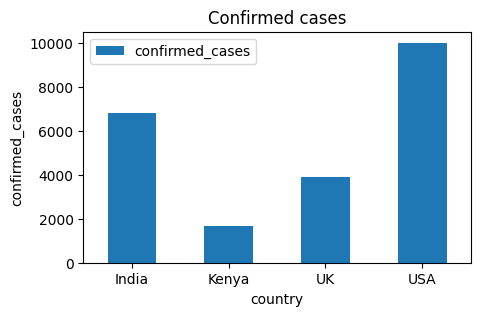

In [191]:
#fetch confirmed cases from each country
#plot bar graph
confirmed_cases=country_totals[["confirmed_cases"]]
confirmed_cases.plot(kind="bar",figsize=(5,3))
plt.title("Confirmed cases")
plt.xlabel("country")
plt.ylabel("confirmed_cases")
plt.xticks(rotation=0)
plt.savefig("covid_confirmed_cases.png")
# plt.show()


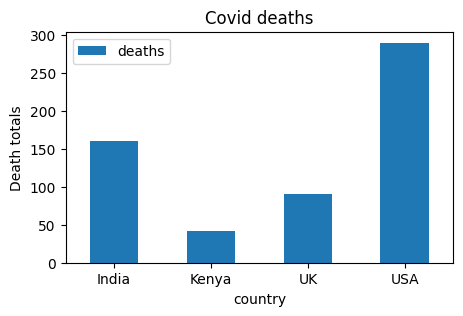

In [192]:
#fetch deaths from each country cases
#plot bar graph
country_totals[["deaths"]].plot(kind="bar",figsize=(5,3))
plt.title("Covid deaths")
plt.xlabel("country")
plt.ylabel("Death totals")
plt.xticks(rotation=0)
plt.savefig("covid_deaths.png")
# plt.show()

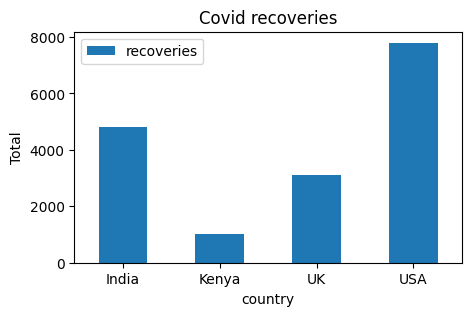

In [193]:
#fetch recoveries from each country cases
#plot bar graph
country_totals[["recoveries"]].plot(kind="bar",figsize=(5,3))
plt.title("Covid recoveries")
plt.xlabel("country")
plt.ylabel("Total")
plt.xticks(rotation=0)
plt.savefig("covid_recoveries.png")
# plt.show()

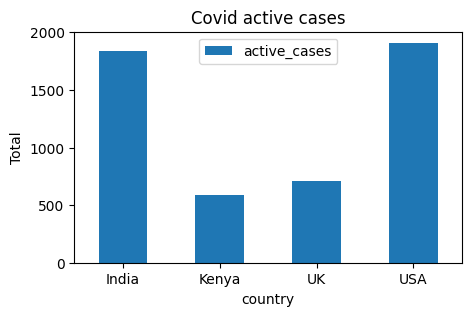

In [196]:
#fetch active cases from each country 
#plot bar graph
country_totals[["active_cases"]].plot(kind="bar",figsize=(5,3))
plt.title("Covid active cases")
plt.xlabel("country")
plt.ylabel("Total")
plt.xticks(rotation=0)
plt.savefig("covid_active_cases.png")
# plt.show()